In [1]:
# TOPSIS Implementation
# Name: Saniya
# Roll No: 102303183
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

data = {
    "Model": ["M1", "M2", "M3", "M4", "M5"],
    "Storage": [16, 16, 32, 32, 16],
    "Camera": [12, 8, 16, 8, 16],
    "Price": [250, 200, 300, 275, 225],
    "Looks": [5, 3, 4, 4, 2]
}

df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)
df


,Model,Storage,Camera,Price,Looks
0,M1,16,12,250,5
1,M2,16,8,200,3
2,M3,32,16,300,4
3,M4,32,8,275,4
4,M5,16,16,225,2


In [4]:
import pandas as pd

data = {
    "Model": ["M1", "M2", "M3", "M4", "M5"],
    "Storage": [16, 16, 32, 32, 16],
    "Camera": [12, 8, 16, 8, 16],
    "Price": [250, 200, 300, 275, 225],
    "Looks": [5, 3, 4, 4, 2]
}

df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)
df


,Model,Storage,Camera,Price,Looks
0,M1,16,12,250,5
1,M2,16,8,200,3
2,M3,32,16,300,4
3,M4,32,8,275,4
4,M5,16,16,225,2


In [5]:
import numpy as np

df_numeric = df.iloc[:, 1:].values.astype(float)

weights = np.array([0.25, 0.25, 0.25, 0.25])
impacts = ['+', '+', '-', '+']

# Normalization
norm = np.sqrt((df_numeric ** 2).sum(axis=0))
normalized = df_numeric / norm

# Weighting
weighted = normalized * weights

# Ideal best & worst
ideal_best = []
ideal_worst = []

for j in range(weighted.shape[1]):
    if impacts[j] == '+':
        ideal_best.append(weighted[:, j].max())
        ideal_worst.append(weighted[:, j].min())
    else:
        ideal_best.append(weighted[:, j].min())
        ideal_worst.append(weighted[:, j].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# Distances
s_plus = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
s_minus = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

# TOPSIS score
scores = s_minus / (s_plus + s_minus)

df["Topsis Score"] = scores
df["Rank"] = df["Topsis Score"].rank(ascending=False).astype(int)

df


,Model,Storage,Camera,Price,Looks,Topsis Score,Rank
0,M1,16,12,250,5,0.534277,3
1,M2,16,8,200,3,0.308368,5
2,M3,32,16,300,4,0.691632,1
3,M4,32,8,275,4,0.534737,2
4,M5,16,16,225,2,0.401046,4


In [6]:
df.to_csv("result.csv", index=False)


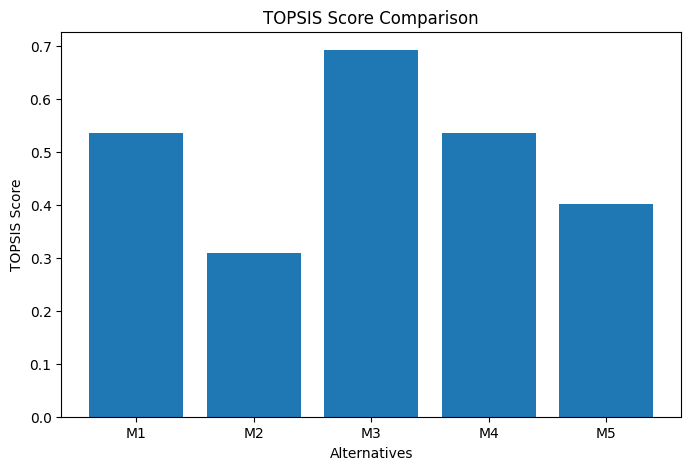

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["Topsis Score"])
plt.xlabel("Alternatives")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Score Comparison")
plt.savefig("image.png")
plt.show()
